In [107]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
x = wine.data
features = wine.feature_names
target = wine.target
df = pd.DataFrame(x, columns=features)


In [108]:
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In this notebook, we will be working with the Wine dataset, which contains information about different wines. The goal of this notebook is to apply the concepts of unsupervised learning, particularly Principal Component Analysis (PCA) and KMeans clustering, to explore the dataset and extract meaningful insights from it. As a data scientist, your task is to load and analyze the dataset, perform a PCA, and create a clustering using KMeans.

**Part 1: Exploratory Analysis**

In this part and analyze the dataset to understand its structure and characteristics.

What is the shape of the dataset?

In [109]:
df.shape


(178, 13)

Are there any missing values in the dataset? If so, how many? Do we need to apply a specific treatment ?

In [110]:
df.isnull().sum().sum()


0

In [111]:
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [112]:
from sklearn.preprocessing import StandardScaler


In [113]:
scaler = StandardScaler().fit(df)
x_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(x_scaled, columns=df.columns)


**Part 2: Principal Component Analysis (PCA)**

In this part, we will perform PCA on the wine dataset. PCA is an unsupervised technique that aims to reduce the dimensionality of the data while retaining as much information as possible. It does this by identifying patterns in the correlations between the different features of the data.

Perform a PCA on the standardized data without specifying the number of principal components to extract.
What is happening ? what is the output shape ?

In [114]:
from sklearn.decomposition import PCA


In [115]:
# Fit PCA with all components
pca = PCA()
pca.fit(df_scaled)

# Transform the data
x_pca = pca.transform(df_scaled)


In [116]:
x_pca.shape


(178, 13)

Performing PCA without specifying the number of principal components to extract will result in all possible principal components being extracted.
The output shape of the PCA will be (n_samples, p), where p is equal to the number of features in the original dataset.

Control that the new basis is orthonormal To do so, take two vectors and verify that the dot product between the two vectors is null and that the dot product of the same vector is equal to 1.

In [117]:
components = pca.components_


In [118]:
component_1 = components[0]
component_2 = components[1]
np.dot(component_1, component_2), np.dot(component_1, component_1), np.dot(component_2, component_2)


(-2.498001805406602e-16, 0.9999999999999992, 0.9999999999999991)

In [119]:
np.linalg.norm(components, axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Plot the cumulative explained variance ratio for all the principal components (use np.cumsum).

In [120]:
import matplotlib.pyplot as plt


In [121]:
cumulative_variance =  np.cumsum(pca.explained_variance_ratio_)


Text(0, 0.5, 'explained variance')

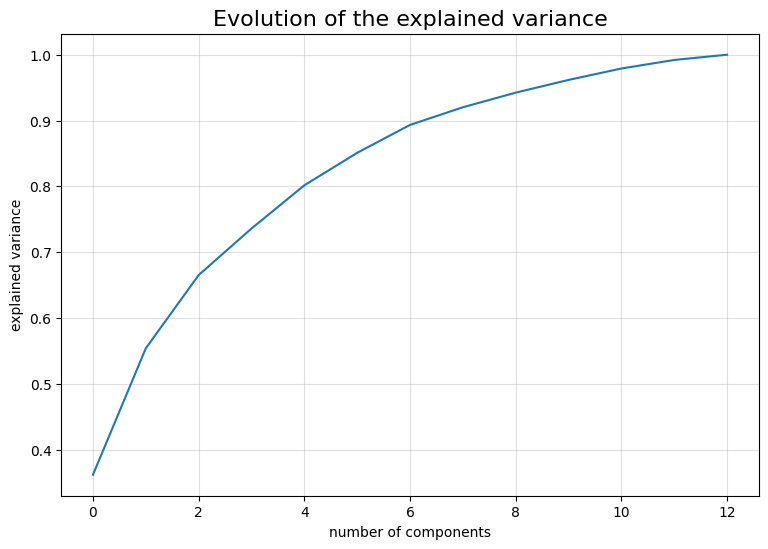

In [122]:
%matplotlib inline
plt.figure(figsize=(9, 6))
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.grid(alpha=0.4)
plt.title("Evolution of the explained variance", size=16)
plt.xlabel("number of components")
plt.ylabel("explained variance")


Identify the number of principal components required to explain at least 90% of the variance in the data.

In [123]:
n_components = 6


For visualization purposes, redo a pca with only two components. Transform also the dataset and convert it into a dataframe.

In [124]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
x_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
df_pca

,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347


Visualize your entire dataset in two dimension.

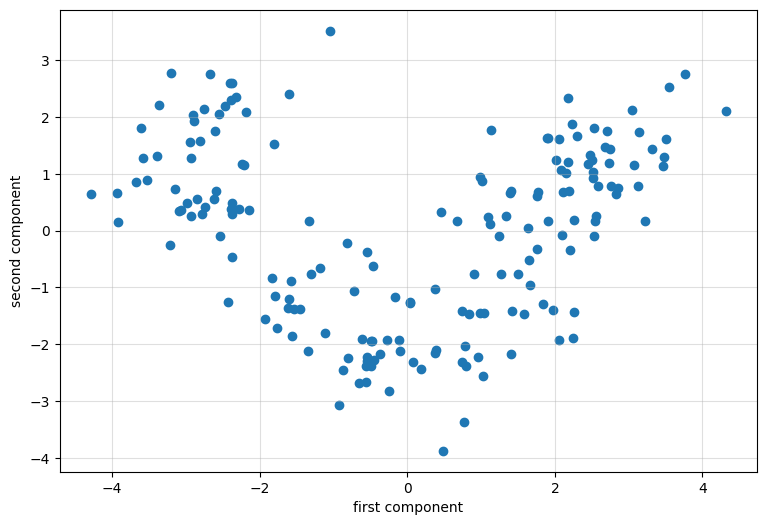

In [125]:
plt.figure(figsize=(9, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"])
plt.xlabel("first component")
plt.ylabel("second component")
plt.grid(alpha=0.4)
plt.show()


Calculate the correlation between your projections (transformed dataset), what can you conclude ?

In [126]:
df_pca.corr()


,PC1,PC2
PC1,1.000000e+00,-3.202409e-16
PC2,-3.202409e-16,1.000000e+00


The correlation between the "projected" components is null, it means that they are orthogonal to each other. This is due to one of the fundamental properties of PCA, where the principal components are computed to be orthogonal to each other.

Visualize your entire dataset in two dimension but by grouping according to the the target

In [127]:
df_pca["target"] = target


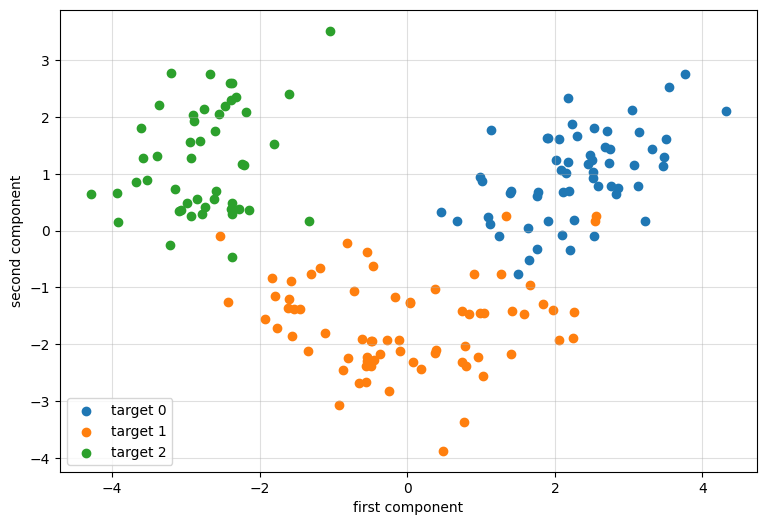

In [142]:
plt.figure(figsize=(9, 6))
plt.scatter(df_pca[df_pca["target"]==0]["PC1"], df_pca[df_pca["target"]==0]["PC2"], label="target 0")
plt.scatter(df_pca[df_pca["target"]==1]["PC1"], df_pca[df_pca["target"]==1]["PC2"], label="target 1")
plt.scatter(df_pca[df_pca["target"]==2]["PC1"], df_pca[df_pca["target"]==2]["PC2"], label="target 2")
plt.xlabel("first component")
plt.ylabel("second component")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


Does the reduction in 2D already make it possible to distinguish the different classes of the target variable?
Yes, the reduction in 2D already makes it possible to distinguish the different classes of the target variable. As we can see in the scatter plot of the first two principal components, there are three different regions that correspond to different values of the target variable. The middle top region corresponds to one target value, while the bottom right and bottom left regions correspond to the other two target values. This suggests that the PCA transformation has been successful in preserving the main features of the data that are relevant for distinguishing the different classes of the target variable.

Bring some interpretation to the first component using the concept of contribution.

In [129]:
df_first_components = pd.DataFrame([component_1], columns=df_scaled.columns).T
df_first_components["contribution"] = df_first_components[0]**2 / np.sum(df_first_components[0]**2)
df_first_components = df_first_components.sort_values("contribution", ascending=False)


In [130]:
df_first_components.contribution


flavanoids                      0.178873
total_phenols                   0.155757
od280/od315_of_diluted_wines    0.141502
proanthocyanins                 0.098238
nonflavanoid_phenols            0.089122
hue                             0.088040
proline                         0.082227
malic_acid                      0.060117
alcalinity_of_ash               0.057274
alcohol                         0.020831
magnesium                       0.020162
color_intensity                 0.007853
ash                             0.000004
Name: contribution, dtype: float64

Text(0, 0.5, 'contribution (%)')

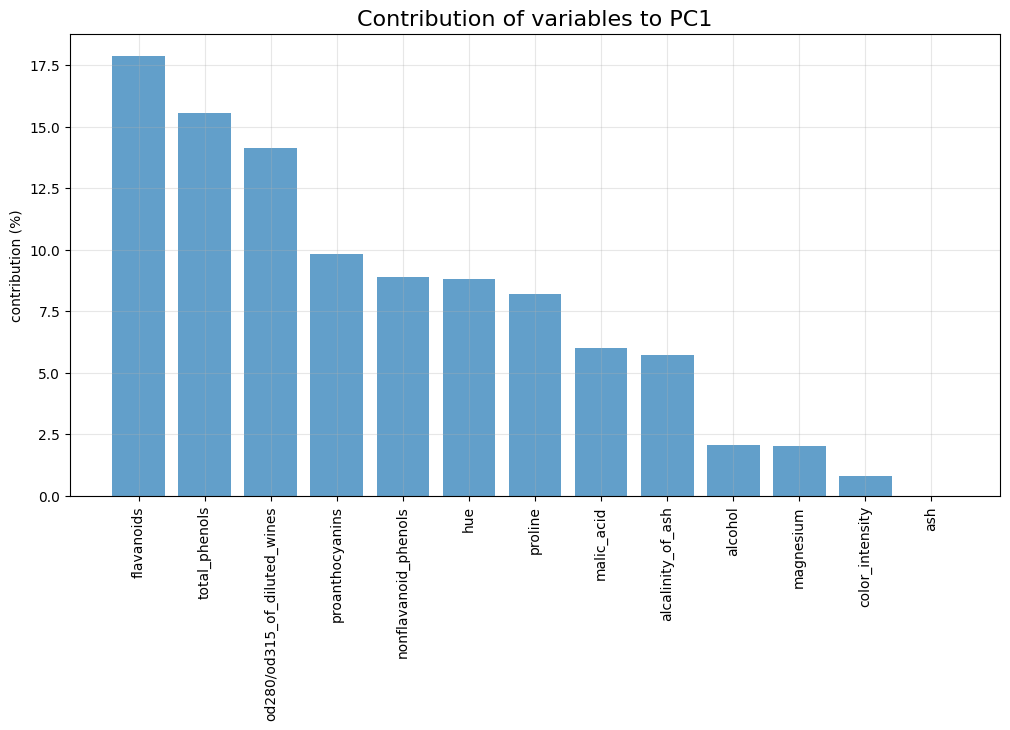

In [131]:
plt.figure(figsize=(12, 6))
plt.bar(df_first_components.index, df_first_components["contribution"]*100, alpha=0.7)
plt.title("Contribution of variables to PC1", size=16)
plt.grid(alpha=0.3)
plt.xticks(rotation=90)
plt.ylabel("contribution (%)")


**Part 3: KMeans Clustering**

In this part, we will use KMeans clustering to create groups of wines based on their characteristics.
The study is based on the whole dataset but can be also conduct on the 'projected' dataset resulting from the previous part.

Determine the optimal number of clusters using the elbow method:

In [132]:
from sklearn.cluster import KMeans


In [133]:
inertia = []
n_cluster_values = range(1, 12)
for k in n_cluster_values:
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    inertia.append(kmeans.inertia_)


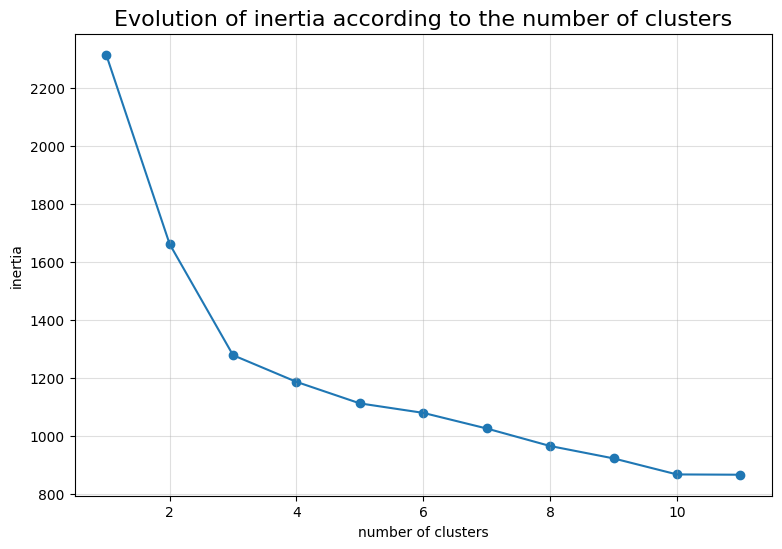

In [134]:
%matplotlib inline
plt.figure(figsize=(9, 6))
plt.title("Evolution of inertia according to the number of clusters", size=16)
plt.plot(n_cluster_values, inertia)
plt.scatter(n_cluster_values, inertia)
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(alpha=0.4)


The elbow point can be found at 3.

Perform your final Kmeans clustering with the found number of clusters. Compute the predicted clusters.

In [135]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)


What do you think of the balance between your clusters ? Interpret the following line of code

In [141]:
pd.Series(clusters).value_counts(normalize=True)


0    0.365169
2    0.348315
1    0.286517
Name: proportion, dtype: float64


Access to the centroids and explain the clusters (without using the target and by looking at the most important features calculated in the previous part).

In [137]:
centroids = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=df_scaled.columns)


In [138]:
df_centroids


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


What is the correlation between your clusters and the target ? What does it means ?

In [139]:
np.corrcoef(target, clusters)


array([[ 1.        , -0.50943784],
       [-0.50943784,  1.        ]])

Since the correlation between the clusters from kmeans and the target variable is 97%, the clusters are highly related to the target variable. In other words, the clustering algorithm was successful in grouping similar observations together based on their attributes, which are also highly correlated with the target variable. This could indicate that the clustering algorithm could be used to predict the target variable for new observations that belong to the same cluster. However, it's important to keep in mind that correlation doesn't necessarily imply causation, so further analysis and testing would be needed to confirm any relationships or predictions made based on the correlation between the clusters and the target variable.

What insights can be gained about the clusters (centroids) in the wine dataset by examining the variables that contribute the most to the first component?
The variables with the highest contribution to the first component are flavanoids (0.178873), total_phenols (0.155757) and od280/od315_of_diluted_wines (0.141502).

In [140]:
df_centroids


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


c:\Users\rahimi\AppData\Local\miniconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\rahimi\AppData\Local\miniconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


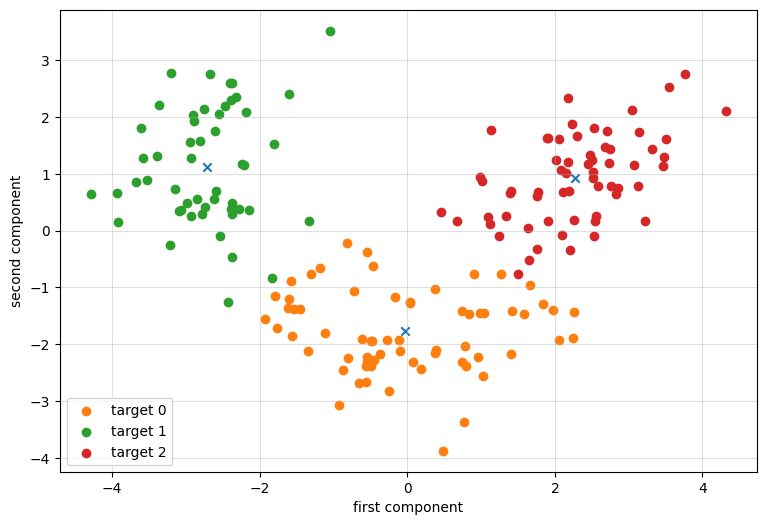

In [167]:
df_pca["target"] = clusters

plt.figure(figsize=(9, 6))
plt.scatter(pca.transform(centroids)[:,0], pca.transform(centroids)[:,1], marker="x")
plt.scatter(df_pca[df_pca["target"]==0]["PC1"], df_pca[df_pca["target"]==0]["PC2"], label="target 0")
plt.scatter(df_pca[df_pca["target"]==1]["PC1"], df_pca[df_pca["target"]==1]["PC2"], label="target 1")
plt.scatter(df_pca[df_pca["target"]==2]["PC1"], df_pca[df_pca["target"]==2]["PC2"], label="target 2")
plt.xlabel("first component")
plt.ylabel("second component")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

Based on the contributions of variables to the first component and the centroids of the clusters provided, we can infer the following insights:

For Cluster 0, the centroid values of flavanoids (0.977820) and total_phenols (0.885237) are relatively high, while the centroid values of nonflavanoid_phenols (-0.562090) and proanthocyanins (0.580287) are lower compared to the other clusters.
This cluster may correspond to wines that are rich in phenolic compounds, with a higher alcohol content.

For Cluster 1, the centroid values of flavanoids (0.020813), total_phenols (-0.075983), alcohol (-0.926072), and magnesium (-0.491712) are lower compared to the other clusters. The centroid values of nonflavanoid_phenols (-0.033534) and proanthocyanins (0.058266) are slightly higher but still relatively low.
This cluster may correspond to wines that are less rich in phenolic compounds, with a lower alcohol content.

For Cluster 2, the centroid values of flavanoids (-1.215248), total_phenols (-0.979330), and proanthocyanins (-0.779706) are negative, while the centroid values of color_intensity (0.941539), hue (-1.164789), and malic_acid (0.871547) are positive, indicating that Cluster 2 has lower values for flavanoids, total_phenols, and proanthocyanins, but higher values for color_intensity, hue, and malic_acid compared to the other clusters.
This cluster may correspond to wines that have a lower level of acidity and higher phenolic compounds, but may not have high values of flavanoids and total phenols.

**Conclusion :**

Overall, the clustering algorithm has identified three distinct groups of wines with different chemical profiles, which can help us understand the factors that influence the quality and characteristics of wines. This information can be useful for winemakers and sommeliers to create better blends and recommendations for their customers.